# Jupiter's Notebook for Scenario 02
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/)<br>
`pip install category_encoders`<br>
`pip install xgboost`<br>
`pip install imbalanced-learn`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-02-Mixed-traffic.csv')

In [4]:
#check dimensions
df.shape

(268579, 52)

## Pre-feature selection

In [5]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [6]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [5]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    268578
srcIP                  12512
srcPrt                 53389
dstIP                  11894
dstPrt                   238
flowduration          164998
total_fpackets           652
total_bpackets           846
total_fpktl             8936
total_bpktl            20556
min_fpktl                151
min_bpktl                496
max_fpktl               1323
max_bpktl               1127
mean_fpktl             19827
mean_bpktl             24418
std_fpktl              35248
std_bpktl              30803
total_fipt            102241
total_bipt             79712
min_fipt               54841
min_bipt               24556
max_fipt               96130
max_bipt               71690
mean_fipt              97713
mean_bipt              76541
std_fipt               84818
std_bipt               67466
fpsh_cnt                 193
bpsh_cnt                 439
furg_cnt                   1
burg_cnt                   1
total_fhlen             3172
total_bhlen   

In [7]:
#delete features with a single unique value
#get the indexes of the single-valued columns
counts=df.nunique()
to_del=[i for i,v in enumerate(counts) if v==1]
print(to_del)
#drop unless columns
df.drop(df.columns[to_del],axis=1,inplace=True)
print(df.shape)

[31, 32, 47, 49]
(268579, 48)


In [8]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    268578
srcIP                  12512
srcPrt                 53389
dstIP                  11894
dstPrt                   238
flowduration          164998
total_fpackets           652
total_bpackets           846
total_fpktl             8936
total_bpktl            20556
min_fpktl                151
min_bpktl                496
max_fpktl               1323
max_bpktl               1127
mean_fpktl             19827
mean_bpktl             24418
std_fpktl              35248
std_bpktl              30803
total_fipt            102241
total_bipt             79712
min_fipt               54841
min_bipt               24556
max_fipt               96130
max_bipt               71690
mean_fipt              97713
mean_bipt              76541
std_fipt               84818
std_bipt               67466
fpsh_cnt                 193
bpsh_cnt                 439
total_fhlen             3172
total_bhlen             4073
fPktsPerSecond        152369
bPktsPerSecond

In [9]:
#delete ts, srcIP and dstIP columns
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

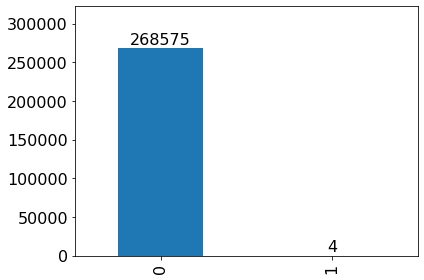

In [10]:
#Consider columns that have very few values, e.g. flow_cwr column
ax = df['flow_cwr'].value_counts().plot(kind='bar',fontsize=16) 
for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.0f}\n', (x + w/2, h), ha='center', va='center', size=16)
plt.margins(y=0.2)
plt.tight_layout()
plt.show()

In [11]:
#delete flow_cwr column
df.drop('flow_cwr',axis=1,inplace=True)

In [12]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 247319, 1: 21260})

In [13]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(268579, 44)
(265823, 44)


In [14]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 244571, 1: 21252})

In [15]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio,label
0,TCP,50427,80,11.999684,14,12,1989,10121,66,66,...,465.769231,564.095703,0.675740,1.588288,2,0,0,26,5.088487,0
1,TCP,38785,80,12.197338,26,17,3311,16298,66,66,...,456.023256,570.117188,0.407021,1.245630,2,0,0,43,4.922380,0
2,TCP,33983,80,0.382890,7,7,814,3990,66,66,...,343.142857,510.992828,0.029794,0.071657,2,2,0,13,4.901720,0
3,TCP,56754,25,0.000013,1,1,66,54,66,54,...,60.000000,8.485281,0.000013,0.000000,0,1,1,1,0.818182,0
4,TCP,56755,25,0.000018,1,1,66,54,66,54,...,60.000000,8.485281,0.000018,0.000000,0,1,1,1,0.818182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268574,UDP,58772,53,0.000551,1,1,81,384,81,384,...,232.500000,214.253357,0.000551,0.000000,0,0,0,0,4.740741,0
268575,UDP,59865,53,0.264637,1,1,74,74,74,74,...,74.000000,0.000000,0.264637,0.000000,0,0,0,0,1.000000,0
268576,UDP,64348,53,0.000295,1,1,74,138,74,138,...,106.000000,45.254833,0.000295,0.000000,0,0,0,0,1.864865,0
268577,UDP,59871,53,0.000000,1,0,74,0,74,0,...,74.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0


In [16]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 244571 of 265823 (92.0%)
> Class 1 : 21252 of 265823 (8.0%)


# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSecond        float64
flowPktsPerSecond     float64
flowBytesP

In [18]:
#create training and test dataset
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [19]:
#load library for target encoder
from category_encoders import TargetEncoder

In [20]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])

# transform the datasets
training_numeric_dataset = enc.fit_transform(X_train, y_train)
testing_numeric_dataset = enc.transform(X_test)

In [21]:
#show the coded features
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
103880,0.000737,0.000000,0.000343,0.080064,1,1,108,192,108,192,...,3.747000e+03,150.0,59.396969,0.080064,0.000000,0,0,0,0,1.777778
124959,0.000737,0.003791,0.000343,0.978804,2,2,164,282,82,141,...,4.556581e+02,111.5,34.063667,0.326313,0.564934,0,0,0,0,1.719512
267159,0.000737,0.000535,0.000343,0.035606,1,1,81,352,81,352,...,1.216090e+04,216.5,191.625931,0.035606,0.000000,0,0,0,0,4.345679
42742,0.278085,0.000073,0.190102,12.820711,4,3,246,174,60,54,...,3.275950e+01,60.0,4.898980,2.136803,4.642579,2,2,0,6,0.707317
131019,0.000737,0.003791,0.000343,0.000265,1,1,80,183,80,183,...,9.928911e+05,131.5,72.832001,0.000265,0.000000,0,0,0,0,2.287500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120496,0.000737,0.000001,0.000343,0.035916,1,1,76,374,76,374,...,1.252929e+04,225.0,210.717819,0.035916,0.000000,0,0,0,0,4.921052
261814,0.000737,0.000000,0.000343,0.185493,1,1,98,180,98,180,...,1.498709e+03,139.0,57.982758,0.185493,0.000000,0,0,0,0,1.836735
132727,0.000737,0.009529,0.000343,6.136319,1,1,75,118,75,118,...,3.145208e+01,96.5,30.405592,6.136319,0.000000,0,0,0,0,1.573333
147873,0.000737,0.001438,0.000343,0.000135,1,1,85,132,85,132,...,1.608064e+06,108.5,33.234020,0.000135,0.000000,0,0,0,0,1.552941


In [22]:
#show the coded features
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
221821,0.000737,0.003791,0.000343,0.000301,1,1,85,169,85,169,...,8.435101e+05,127.000000,59.396969,0.000301,0.000000,0,0,0,0,1.988235
238197,0.000737,0.079936,0.000343,0.000264,1,1,74,138,74,138,...,8.032452e+05,106.000000,45.254833,0.000264,0.000000,0,0,0,0,1.864865
122241,0.000737,0.000000,0.000343,13.270593,7,7,690,918,94,122,...,1.211702e+02,114.857143,24.964151,1.026448,3.657084,0,0,0,0,1.330435
72684,0.278085,0.555396,0.190102,6.241960,7,7,848,2614,60,54,...,5.546335e+02,247.285714,384.868286,0.852017,1.799235,2,2,0,13,3.082547
233255,0.000737,0.079936,0.000343,0.000164,1,1,85,144,85,144,...,1.396069e+06,114.500000,41.719299,0.000164,0.000000,0,0,0,0,1.694118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223456,0.000737,0.285205,0.000343,3.092232,2,2,144,826,72,413,...,3.136893e+02,242.500000,196.876434,1.149838,1.691254,0,0,0,0,5.736111
31302,0.278085,0.009529,0.190102,5.018024,5,5,666,2076,60,54,...,5.464302e+02,274.200000,447.667755,1.113762,2.205917,1,2,0,9,3.117117
220007,0.000737,0.003791,0.000343,6.275454,1,1,74,156,74,156,...,3.665073e+01,115.000000,57.982758,6.275454,0.000000,0,0,0,0,2.108108
109144,0.000737,0.003791,0.000343,18.313331,4,4,308,648,77,162,...,5.220241e+01,119.500000,45.434410,2.616190,3.705729,0,0,0,0,2.103896


# Standardization and scaling of numerical variables

In [23]:
# import libraries
from sklearn.preprocessing import StandardScaler

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [24]:
X_train_prep = preprocessor.fit_transform(training_numeric_dataset)
X_test_prep  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

In [25]:
#Dimensiones del los datasets de training y testing
X_train_prep.shape, X_test_prep.shape

((212658, 43), (53165, 43))

# Feature selection
Exclusion of variables with variance close to zero

In [26]:
#join the prepared traing and test datasets in a single array X and y
X = np.vstack((X_train_prep, X_test_prep))
y = np.hstack((y_train, y_test))

In [27]:
collections.Counter(y)

Counter({0: 244571, 1: 21252})

>Threshold=0.00, Features=43
>Threshold=0.05, Features=43
>Threshold=0.10, Features=43
>Threshold=0.15, Features=43
>Threshold=0.20, Features=43
>Threshold=0.25, Features=43
>Threshold=0.30, Features=43
>Threshold=0.35, Features=42
>Threshold=0.40, Features=42
>Threshold=0.45, Features=42
>Threshold=0.50, Features=42
>Threshold=0.55, Features=42
>Threshold=0.60, Features=42
>Threshold=0.65, Features=41


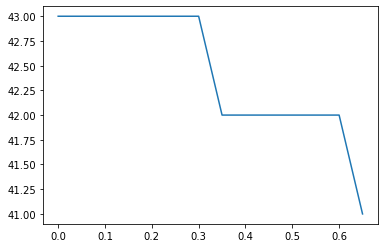

In [28]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
#split data into inputs
#data=df_float.values
#X=data[:,:]
#define thresholds to check
thresholds = arange(0.0,0.7,0.05)
#apply transform with each treshold
results=list()
for t in thresholds:
    #define the transform
    transform = VarianceThreshold(threshold=t)
    #transform the input data
    X_sel=transform.fit_transform(X)
    #determine the number of input features
    n_features=X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' %(t,n_features))
    #store the result
    results.append(n_features)
#plot the theshold vs the number of selected features
plt.plot(thresholds,results)
plt.show()

In [29]:
#new set of selected features
X=X_sel
print(X.shape)

(265823, 41)


# Create Machine Learning Models

### a) Grid search with Logistic Regression (GS-LR)

In [30]:
# grid search class weights with logistic regression for imbalanced classification

model = LogisticRegression(solver='lbfgs',max_iter=1000)
# define grid
balance = [{0:0.001,1:1.0},{0:0.01,1:1.0}, {0:0.1,1:1}, {0:1,1:100},{0:1,1:200}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.995046 using {'class_weight': {0: 0.1, 1: 1}}
0.992446 (0.001200) with: {'class_weight': {0: 0.001, 1: 1.0}}
0.993965 (0.001297) with: {'class_weight': {0: 0.01, 1: 1.0}}
0.995046 (0.000997) with: {'class_weight': {0: 0.1, 1: 1}}
0.994206 (0.001342) with: {'class_weight': {0: 1, 1: 100}}
0.993822 (0.000997) with: {'class_weight': {0: 1, 1: 200}}


C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
## split into train test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Using the obtained weights for training the model GS-LR
weights = {0: 0.01, 1: 1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights,max_iter=2000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.9496361158034277
Accuracy score: 0.9114078811248002
F1 score: 0.6370221948212084
Recall score: 0.9949446316803081
Precision score: 0.4684878712310134
              precision    recall  f1-score   support

     class 0       1.00      0.90      0.95     49011
     class 1       0.47      0.99      0.64      4154

    accuracy                           0.91     53165
   macro avg       0.73      0.95      0.79     53165
weighted avg       0.96      0.91      0.93     53165



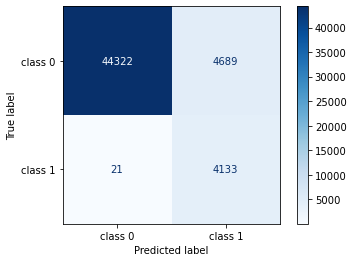

In [29]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(model, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### b) Logistic Regression with Synthetic minority over-sampleing technique (LR+SMOTE)

In [38]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
X_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 244571, 1: 21252})
Resample dataset shape: Counter({0: 244571, 1: 244571})


In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote, test_size =0.20, random_state=42)

In [40]:
model2=LogisticRegression(solver='lbfgs',max_iter=2000)
model2.fit(X_train2, y_train2)
y_pred2=model2.predict(X_test2)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.9805331180195875
Accuracy score: 0.9805476903576649
F1 score: 0.9807343814855686
Recall score: 0.9884093459851035
Precision score: 0.9731776902676204
              precision    recall  f1-score   support

     class 0       0.99      0.97      0.98     48824
     class 1       0.97      0.99      0.98     49005

    accuracy                           0.98     97829
   macro avg       0.98      0.98      0.98     97829
weighted avg       0.98      0.98      0.98     97829



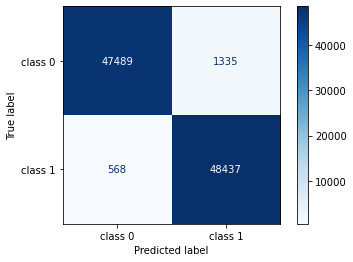

In [41]:
print('ROCAUC score:',roc_auc_score(y_test2, y_pred2))
print('Accuracy score:',accuracy_score(y_test2, y_pred2))
print('F1 score:',f1_score(y_test2, y_pred2))
print('Recall score:',recall_score(y_test2, y_pred2))
print('Precision score:',precision_score(y_test2, y_pred2))

print(classification_report(y_test2, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, X_test2, y_test2, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Support Vector Machine (W-SVM)

In [43]:
#train a model using Penalized-SVM on the original imbalanced dataset
# we can add class_weight='balanced' to add panalize mistake
model_SVM = SVC(class_weight='balanced', probability=True)
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

In [44]:
y_pred_SVM = model_SVM.predict(X_test)

ROCAUC score: 0.6342293856054855
Accuracy score: 0.3573027367629079
F1 score: 0.18963595399027627
Recall score: 0.9624458353394318
Precision score: 0.10518007945068533
              precision    recall  f1-score   support

     class 0       0.99      0.31      0.47     49011
     class 1       0.11      0.96      0.19      4154

    accuracy                           0.36     53165
   macro avg       0.55      0.63      0.33     53165
weighted avg       0.92      0.36      0.45     53165



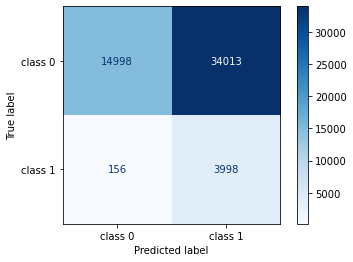

In [45]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred_SVM))
print('Accuracy score:',accuracy_score(y_test, y_pred_SVM))
print('F1 score:',f1_score(y_test, y_pred_SVM))
print('Recall score:',recall_score(y_test, y_pred_SVM))
print('Precision score:',precision_score(y_test, y_pred_SVM))

print(classification_report(y_test, y_pred_SVM, target_names=target_names))
plot_confusion_matrix(model_SVM, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

# Undersampling using CNN
Condensed Nearest Neighbor (CNN) is used to remove redundant examples from the interior of the density of the majority class. 

In [46]:
# undersample an imbalanced dataset with the Condensed Nearest Neighbor Rule
from imblearn.under_sampling import CondensedNearestNeighbour

In [47]:
counter = Counter(y)
print(counter)

Counter({0: 244571, 1: 21252})


In [48]:
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
Xu, yu = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(yu)
print(counter)

Counter({1: 21252, 0: 1646})


### d) Weighted Decision Tree with Condensed Nearest Neighbor (DT+CNN)
The `DecisionTreeClassifier` class provides the class weight argument that can be speci ed as a model hyperparameter. The class weight is a dictionary that de nes each class label (e.g. 0 and 1) and the weighting to apply in the calculation of group purity for splits in the decision tree when tting the model.

In [49]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xu, yu, test_size =0.20, random_state=42)

In [50]:
# define model
model_DT = DecisionTreeClassifier(class_weight='balanced')
#model performance
model_DT.fit(X_train3, y_train3)
y_pred_DT=model_DT.predict(X_test3)

ROCAUC score: 0.9827341095957856
Accuracy score: 0.9962882096069869
F1 score: 0.9980128579777907
Recall score: 0.9983629560336763
Precision score: 0.9976630053750877
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97       304
     class 1       1.00      1.00      1.00      4276

    accuracy                           1.00      4580
   macro avg       0.99      0.98      0.98      4580
weighted avg       1.00      1.00      1.00      4580



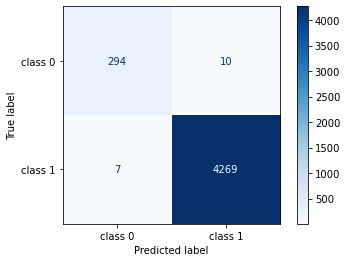

In [51]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_DT))
print('Accuracy score:',accuracy_score(y_test3, y_pred_DT))
print('F1 score:',f1_score(y_test3, y_pred_DT))
print('Recall score:',recall_score(y_test3, y_pred_DT))
print('Precision score:',precision_score(y_test3, y_pred_DT))

print(classification_report(y_test3, y_pred_DT, target_names=target_names))
plot_confusion_matrix(model_DT, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);

### e) Support Vector Machine with Condensed Nearest Neighbor (SVM+CNN)

In [54]:
model_SVM_cnn = SVC(class_weight='balanced', probability=True)
model_SVM_cnn.fit(X_train3, y_train3)
y_pred_SVM_cnn = model_SVM_cnn.predict(X_test3)

ROCAUC score: 0.8199467037565851
Accuracy score: 0.8292576419213974
F1 score: 0.9008369261983261
Recall score: 0.8306828811973808
Precision score: 0.9839335180055402
              precision    recall  f1-score   support

     class 0       0.25      0.81      0.39       304
     class 1       0.98      0.83      0.90      4276

    accuracy                           0.83      4580
   macro avg       0.62      0.82      0.64      4580
weighted avg       0.94      0.83      0.87      4580



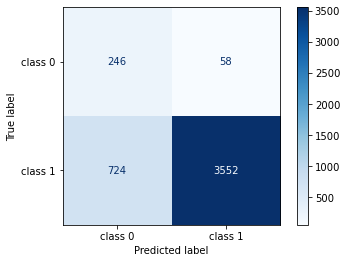

In [55]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_SVM_cnn))
print('Accuracy score:',accuracy_score(y_test3, y_pred_SVM_cnn))
print('F1 score:',f1_score(y_test3, y_pred_SVM_cnn))
print('Recall score:',recall_score(y_test3, y_pred_SVM_cnn))
print('Precision score:',precision_score(y_test3, y_pred_SVM_cnn))

print(classification_report(y_test3, y_pred_SVM_cnn, target_names=target_names))
plot_confusion_matrix(model_SVM_cnn, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);